# Enzymes and Drug Metabolism

Welcome! In this notebook, we will be exploring how genetic variation in CYP2D6 (a liver enzyme) affects how patients metabolize common drugs like codeine or antidepressants. 

By the end of this notebook, you will have familiarity with:
- Enzyme inhibition



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('relationships/relationships.tsv', sep='\t')
df = df.loc[df['Entity1_name'] == 'CYP2D6']
df.head()

,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PK,PD,PMIDs
19378,PA128,CYP2D6,Gene,PA10026,aripiprazole,Chemical,"ClinicalAnnotation,GuidelineAnnotation,LabelAn...",ambiguous,NaN,NaN,17828532;17965519;21739267;24232129;25868121;2...
19379,PA128,CYP2D6,Gene,PA10035,bromazepam,Chemical,Pathway,associated,NaN,NaN,NaN
19380,PA128,CYP2D6,Gene,PA10066,duloxetine,Chemical,"GuidelineAnnotation,LabelAnnotation,MultilinkA...",ambiguous,NaN,NaN,17380590;17713974;23545896;25969720;30207201;3...
19381,PA128,CYP2D6,Gene,PA10074,escitalopram,Chemical,"ClinicalAnnotation,DataAnnotation,GuidelineAnn...",ambiguous,NaN,PD,18070221;20350136;21926427;23545896;24302953;2...
19382,PA128,CYP2D6,Gene,PA10268,flupenthixol,Chemical,GuidelineAnnotation,associated,NaN,NaN,NaN


In [40]:
#Contains in vitro and functional analysis-type associations.
df = pd.read_csv('variantAnnotations/var_fa_ann.tsv', sep='\t')
df = df.loc[df['Gene'] == 'CYP2D6']
df = df[['Gene', 'Drug(s)', 'Phenotype Category', 'Significance', 'Alleles', 'Metabolizer types', 'Is/Is Not associated']]
print(len(df))
display(df.isna().sum())
df.head()

159


Gene                      0
Drug(s)                  17
Phenotype Category        0
Significance              0
Alleles                   4
Metabolizer types       153
Is/Is Not associated      0
dtype: int64

,Gene,Drug(s),Phenotype Category,Significance,Alleles,Metabolizer types,Is/Is Not associated
52,CYP2D6,codeine,Metabolism/PK,no,*27,NaN,Not associated with
53,CYP2D6,dextromethorphan,Metabolism/PK,not stated,*10,NaN,Associated with
54,CYP2D6,dextromethorphan,Metabolism/PK,not stated,*17,NaN,Associated with
55,CYP2D6,codeine,Metabolism/PK,not stated,*10,NaN,Associated with
56,CYP2D6,dextromethorphan,Metabolism/PK,not stated,*2,NaN,Associated with


In [3]:
#Contains associations in which the variant affects a drug dose, response, metabolism, etc.
df = pd.read_csv('variantAnnotations/var_drug_ann.tsv', sep='\t')
df = df.loc[df['Gene'] == 'CYP2D6']
print(len(df))
display(df.isna().sum())
df.head(1)

725


Variant Annotation ID                       0
Variant/Haplotypes                          0
Gene                                        0
Drug(s)                                     0
PMID                                        0
Phenotype Category                          0
Significance                                0
Notes                                      26
Sentence                                    0
Alleles                                   236
Specialty Population                      670
Metabolizer types                         389
isPlural                                    0
Is/Is Not associated                        0
Direction of effect                       108
PD/PK terms                                 0
Multiple drugs And/or                     652
Population types                          112
Population Phenotypes or diseases         370
Multiple phenotypes or diseases And/or    694
Comparison Allele(s) or Genotype(s)       363
Comparison Metabolizer types      

,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,...,isPlural,Is/Is Not associated,Direction of effect,PD/PK terms,Multiple drugs And/or,Population types,Population Phenotypes or diseases,Multiple phenotypes or diseases And/or,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
12,982047744,CYP2D6*1xN,CYP2D6,codeine,19692698,Metabolism/PK,not stated,A 2 year old boy with an ultrarapid-metabolize...,CYP2D6 *1xN is associated with increased metab...,*1xN,...,Is,Associated with,increased,metabolism of,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Metabolizer types'>

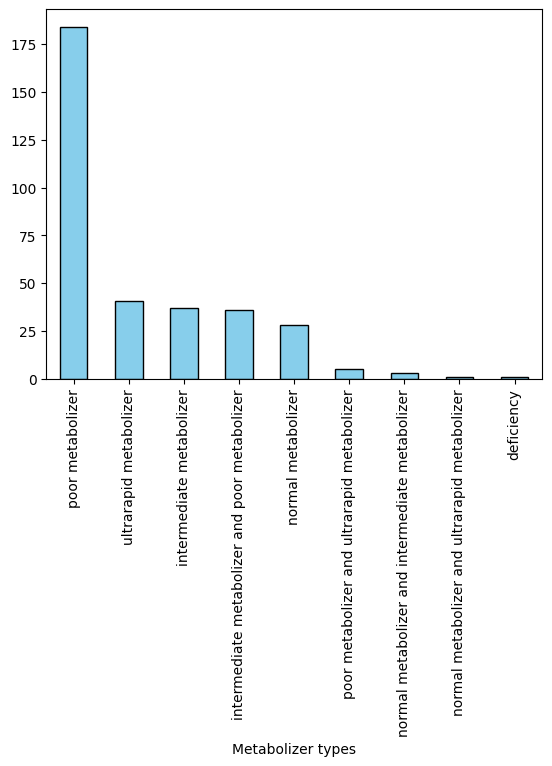

In [4]:
category_counts = df['Metabolizer types'].value_counts()
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

In [17]:
indep = 'Phenotype Category'
dep = 'Population types'
cross_tab = pd.crosstab(df[indep], df[dep])
heatmap_data = cross_tab.reset_index().melt(id_vars=indep, var_name=dep, value_name='Count')

# Plot heatmap
fig = px.density_heatmap(heatmap_data, x=indep, y=dep, z='Count', text_auto=True,
                         title='Metabolizer types vs. Phenotype Category Heatmap')

fig.show()

In [ ]:
indep = 'Metabolizer types'
dep = 'Population types'
cross_tab = pd.crosstab(df[indep], df[dep])
heatmap_data = cross_tab.reset_index().melt(id_vars=indep, var_name=dep, value_name='Count')

# Plot heatmap
fig = px.density_heatmap(heatmap_data, x=indep, y=dep, z='Count', text_auto=True,
                         title='Metabolizer types vs. Phenotype Category Heatmap')

fig.show()

In [42]:
#Contains associations in which the variant affects a phenotype, with or without drug information.
df = pd.read_csv('variantAnnotations/var_pheno_ann.tsv', sep='\t')
df = df.loc[df['Gene'] == 'CYP2D6']
print(len(df))
display(df.isna().sum())
df.head(1)

662


Variant Annotation ID                               0
Variant/Haplotypes                                  0
Gene                                                0
Drug(s)                                            20
PMID                                                0
Phenotype Category                                  1
Significance                                        0
Notes                                              60
Sentence                                            0
Alleles                                           147
Specialty Population                              626
Metabolizer types                                 456
isPlural                                            0
Is/Is Not associated                                0
Direction of effect                               169
Side effect/efficacy/other                        406
Phenotype                                           0
Multiple phenotypes And/or                        413
When treated with/exposed to

,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,...,Side effect/efficacy/other,Phenotype,Multiple phenotypes And/or,When treated with/exposed to/when assayed with,Multiple drugs And/or,Population types,Population Phenotypes or diseases,Multiple phenotypes or diseases And/or,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
9,1453086780,CYP2D6 ultrarapid metabolizer,CYP2D6,"aripiprazole, risperidone",40130908,Efficacy,no,"""Among risperidone users, we observed no assoc...",CYP2D6 ultrarapid metabolizer is not associate...,NaN,...,likelihood of,Other:Medication adherence,NaN,when treated with,NaN,in people with,"Other:Schizophrenia, Other:Schizoaffective dis...",or,NaN,normal metabolizer


- Analyze variant data from PharmGKB.
- Predict impact of different genotypes (e.g., poor vs ultrarapid metabolizers).
- Link to adverse drug reactions or treatment failure.
- Visualize allele frequencies across populations.

# real draft starts here

Enzyme overview: The CYP450 family of enzymes, particularly CYP2D6, plays a critical role in metabolizing various drugs. Variations in the CYP2D6 gene (due to single nucleotide polymorphisms (SNPs)) can affect how effectively a person processes certain medications. These variations can lead to adverse drug reactions or treatment failures if not accounted for in personalized medicine.

### The Objective:

Explore the genetic variation in the CYP2D6 gene and how it affects drug metabolism, specifically in terms of:
- Metabolizer phenotypes (e.g., poor metabolizer, extensive metabolizer, ultrarapid metabolizer).
- Drug metabolism outcomes for patients using drugs like codeine, tamoxifen, or antidepressants.

Questions:

Question:
In the case of CYP2D6, a key enzyme involved in drug metabolism, how might feedback inhibition regulate its activity in response to the accumulation of certain metabolites (e.g., morphine from codeine)? Discuss the potential consequences if feedback inhibition was not properly functioning in the context of drug metabolism.

Why is it important for the body to tightly regulate the activity of enzymes like CYP2D6? How would chemical chaos impact a patient's response to drugs if CYP2D6 were overactive or underactive?

Coenzymes play an important role in enzyme activity. For enzymes like CYP2D6, which metabolize various drugs, what role do you think organic coenzymes (such as vitamins) might play in modulating enzyme activity? Provide a specific example, if possible, of a coenzyme that might influence CYP2D6 function and its ability to metabolize drugs like tamoxifen or codeine.

As with all enzymes, CYP2D6 activity can be influenced by environmental factors such as temperature and pH. In the context of drug metabolism, how might a change in pH or temperature (such as a fever or a sudden temperature shift) affect the activity of CYP2D6 and, consequently, the metabolism of drugs? What would happen if CYP2D6 is not working within the optimal temperature or pH range?